# Preparing Time Series Data

What is it?
- how we prepare the data specifically for time series data
- like most preparation processes, but with the addition of dates!

Why do we care?
- we want to ensure that pandas is properly aware of dates, so we can investigate trends over time

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import acquire

Scenario: Working with store data to predict the sale_amount

## Acquire

In [2]:
#load my csv
df = acquire.get_store_data()

In [3]:
df.head()

,store_id,item_id,sale_id,sale_date,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
0,1,1,1,2013-01-01,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,2,2013-01-02,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,3,2013-01-03,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,4,2013-01-04,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,5,2013-01-05,10,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   store_id       913000 non-null  int64  
 1   item_id        913000 non-null  int64  
 2   sale_id        913000 non-null  int64  
 3   sale_date      913000 non-null  object 
 4   sale_amount    913000 non-null  int64  
 5   item_upc14     913000 non-null  int64  
 6   item_upc12     913000 non-null  int64  
 7   item_brand     913000 non-null  object 
 8   item_name      913000 non-null  object 
 9   item_price     913000 non-null  float64
 10  store_address  913000 non-null  object 
 11  store_zipcode  913000 non-null  int64  
 12  store_city     913000 non-null  object 
 13  store_state    913000 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 97.5+ MB


In [5]:
df.isnull().sum()

store_id         0
item_id          0
sale_id          0
sale_date        0
sale_amount      0
item_upc14       0
item_upc12       0
item_brand       0
item_name        0
item_price       0
store_address    0
store_zipcode    0
store_city       0
store_state      0
dtype: int64

In [6]:
df.shape

(913000, 14)

In [7]:
df.describe()

,store_id,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_price,store_zipcode
count,913000.000000,913000.000000,913000.000000,913000.000000,9.130000e+05,9.130000e+05,913000.000000,913000.000000
mean,5.500000,25.500000,456500.500000,52.250287,2.384688e+11,2.384688e+11,5.160400,78224.800000
std,2.872283,14.430878,263560.542224,28.801144,2.978005e+11,2.978005e+11,2.737764,16.479087
min,1.000000,1.000000,1.000000,0.000000,8.500005e+09,8.500005e+09,0.600000,78201.000000
25%,3.000000,13.000000,228250.750000,30.000000,3.367410e+10,3.367410e+10,2.970000,78217.000000
50%,5.500000,25.500000,456500.500000,47.000000,7.103651e+10,7.103651e+10,5.195000,78220.500000
75%,8.000000,38.000000,684750.250000,70.000000,6.030842e+11,6.030842e+11,7.520000,78232.000000
max,10.000000,50.000000,913000.000000,231.000000,8.846237e+11,8.846237e+11,9.640000,78253.000000


In [8]:
df.head()

,store_id,item_id,sale_id,sale_date,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
0,1,1,1,2013-01-01,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,2,2013-01-02,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,3,2013-01-03,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,4,2013-01-04,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,5,2013-01-05,10,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


#### range of dates? 

In [9]:
df.sale_date.min()

'2013-01-01'

In [10]:
df.sale_date.max()

'2017-12-31'

In [11]:
df.sale_date.dtype

dtype('O')

store_id


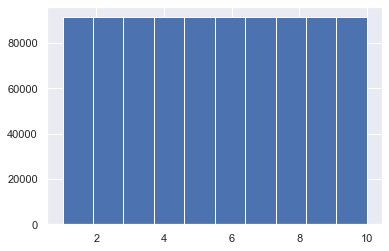

item_id


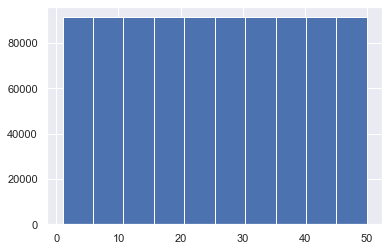

sale_id


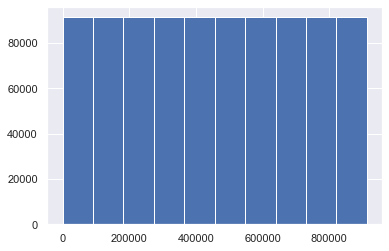

sale_date


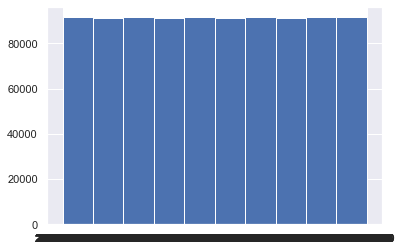

sale_amount


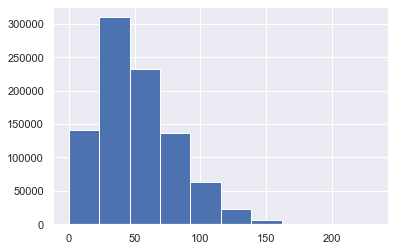

item_upc14


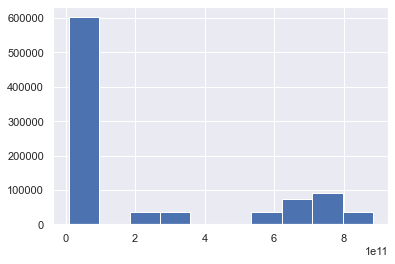

item_upc12


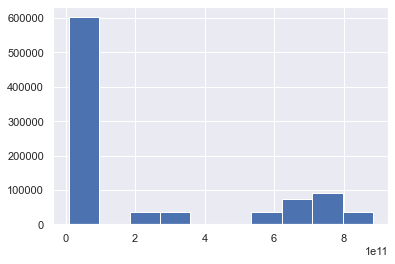

item_brand


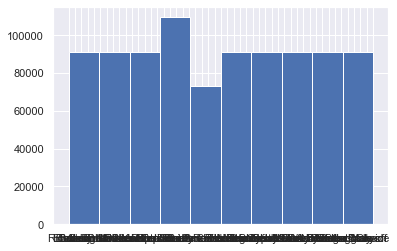

item_name


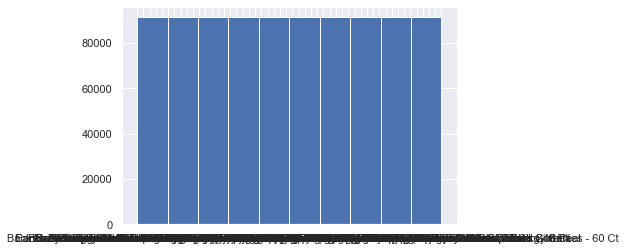

item_price


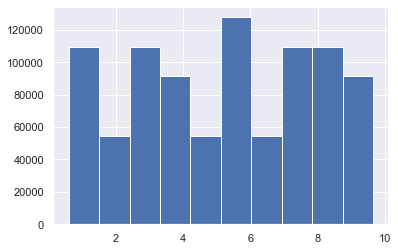

store_address


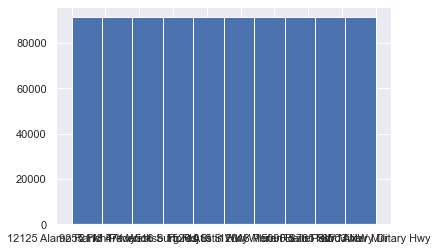

store_zipcode


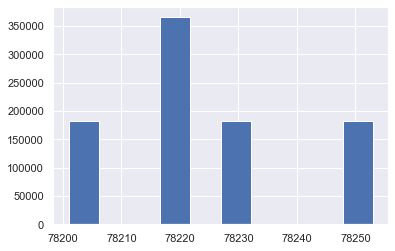

store_city


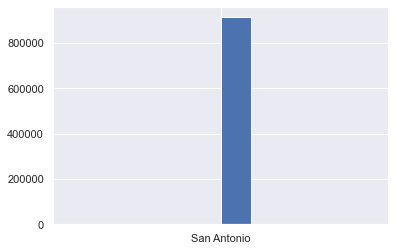

store_state


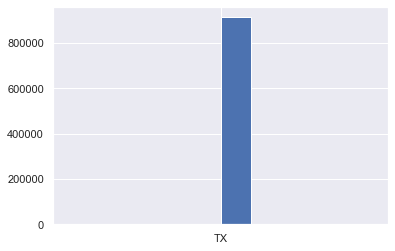

In [12]:
for col in df.columns:
    print(col)
    plt.hist(df[col])
    plt.show()

## Prepare

for time series data: 
- make pandas time aware
- look at the frequency of the data 
- look for gaps in time or null values
- get to know our data a litte better

### make pandas time aware

1. Convert 'date' column to datetime object
2. Set the datetime column as index
3. Sort the datetime index

formatting info: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

#### 1. Convert 'date' column to datetime object

In [13]:
df.sale_date.astype('datetime64')

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
912995   2017-12-27
912996   2017-12-28
912997   2017-12-29
912998   2017-12-30
912999   2017-12-31
Name: sale_date, Length: 913000, dtype: datetime64[ns]

In [14]:
df.sale_date = pd.to_datetime(df.sale_date)
df

,store_id,item_id,sale_id,sale_date,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
0,1,1,1,2013-01-01,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,2,2013-01-02,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,3,2013-01-03,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,4,2013-01-04,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,5,2013-01-05,10,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,10,50,912996,2017-12-27,63,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,8503 NW Military Hwy,78231,San Antonio,TX
912996,10,50,912997,2017-12-28,59,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,8503 NW Military Hwy,78231,San Antonio,TX
912997,10,50,912998,2017-12-29,74,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,8503 NW Military Hwy,78231,San Antonio,TX
912998,10,50,912999,2017-12-30,62,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,8503 NW Military Hwy,78231,San Antonio,TX


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   store_id       913000 non-null  int64         
 1   item_id        913000 non-null  int64         
 2   sale_id        913000 non-null  int64         
 3   sale_date      913000 non-null  datetime64[ns]
 4   sale_amount    913000 non-null  int64         
 5   item_upc14     913000 non-null  int64         
 6   item_upc12     913000 non-null  int64         
 7   item_brand     913000 non-null  object        
 8   item_name      913000 non-null  object        
 9   item_price     913000 non-null  float64       
 10  store_address  913000 non-null  object        
 11  store_zipcode  913000 non-null  int64         
 12  store_city     913000 non-null  object        
 13  store_state    913000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(7), object(5

#### 2. Set the datetime column as Index

In [16]:
df = df.set_index('sale_date')

In [17]:
df.head()

,store_id,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2013-01-01,1,1,1,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-02,1,1,2,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-03,1,1,3,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-04,1,1,4,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-05,1,1,5,10,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


#### 3. Sort the datetime index

In [18]:
df = df.sort_index()

In [19]:
df.head()

,store_id,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2013-01-01,1,1,1,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-01,7,12,211817,26,74676640211,74676640211,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX
2013-01-01,7,46,832657,27,35457770664,35457770664,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX
2013-01-01,8,12,213643,54,74676640211,74676640211,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX
2013-01-01,9,12,215469,35,74676640211,74676640211,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX


### Frequency of data 
- how much data do we have for each date?

In [20]:
df.index.value_counts()

2013-01-01    500
2016-05-11    500
2016-05-09    500
2016-05-08    500
2016-05-07    500
             ... 
2014-08-29    500
2014-08-28    500
2014-08-27    500
2014-08-26    500
2017-12-31    500
Name: sale_date, Length: 1826, dtype: int64

In [21]:
df.index.value_counts().value_counts()

500    1826
Name: sale_date, dtype: int64

### Check for gaps in time

In [22]:
#earliest day
df.index.min()

Timestamp('2013-01-01 00:00:00')

In [23]:
#latest day
df.index.max()

Timestamp('2017-12-31 00:00:00')

In [24]:
#difference between days plus one
df.index.max() - df.index.min()  + pd.Timedelta('1d')

Timedelta('1826 days 00:00:00')

In [25]:
#see how many unique days we actually have
df.index.nunique()

1826

In [26]:
#dropping days to show gaps in time
df_test = df.drop(index=['2017-12-30','2014-01-02','2016-03-28'])

In [27]:
#see how many unique days we actually have
df_test.index.nunique()

1823

In [28]:
#establish all the expected dates in our range
#pd.daterange()
expected_range = pd.date_range(start=df_test.index.min(), end=df_test.index.max())
expected_range

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', length=1826, freq='D')

In [29]:
#find whats missing between dates
#df.difference()
expected_range.difference(df_test.index)

DatetimeIndex(['2014-01-02', '2016-03-28', '2017-12-30'], dtype='datetime64[ns]', freq=None)

## Let's get to know our data a litte better

Target variable: sale_amount

- understand what one row is & some of the important columns
- does the time frame of our rows make sense?
    - does it need to be more or less granular?
- investigate the data behind the unique combinations of store & item

### number of distinct stores? items? sales? sales_dates?

In [30]:
df.head()

,store_id,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2013-01-01,1,1,1,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-01,7,12,211817,26,74676640211,74676640211,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX
2013-01-01,7,46,832657,27,35457770664,35457770664,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX
2013-01-01,8,12,213643,54,74676640211,74676640211,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX
2013-01-01,9,12,215469,35,74676640211,74676640211,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX


In [31]:
df.store_id.nunique()

10

In [32]:
df.item_id.nunique()

50

In [33]:
df.sale_id.nunique()

913000

In [34]:
df.index.nunique()

1826

### Is each store equally represented in this dataset?

In [35]:
df.store_id.value_counts()

1     91300
7     91300
8     91300
9     91300
10    91300
6     91300
2     91300
5     91300
3     91300
4     91300
Name: store_id, dtype: int64

### Is each item equally represented in this dataset?

In [36]:
df.item_id.value_counts().head()

1     18260
33    18260
39    18260
31    18260
32    18260
Name: item_id, dtype: int64

### Plot target variable over time

target_variable: sale_amount

In [ ]:
df.head()

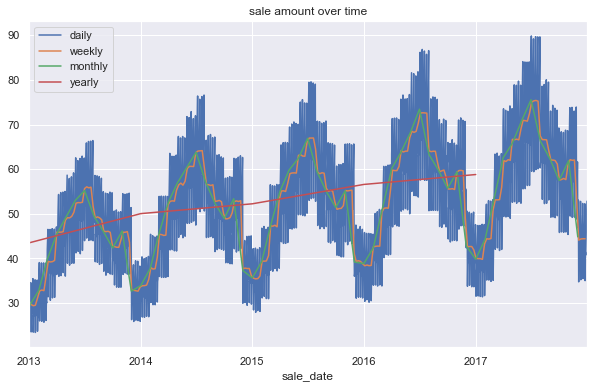

In [37]:
plt.figure(figsize=(10,6))

df.resample('D').mean().sale_amount.plot(label='daily')
df.resample('W').mean().sale_amount.plot(label='weekly')
df.resample('M').mean().sale_amount.plot(label='monthly')
df.resample('Y').mean().sale_amount.plot(label='yearly')


plt.title('sale amount over time')
plt.legend()
plt.show()

### what's the first sale date for each store/item combination?

In [ ]:
# df.groupby(['store','item']).index

In [38]:
df.reset_index().groupby(['store_id','item_id']).sale_date.min()

store_id  item_id
1         1         2013-01-01
          2         2013-01-01
          3         2013-01-01
          4         2013-01-01
          5         2013-01-01
                       ...    
10        46        2013-01-01
          47        2013-01-01
          48        2013-01-01
          49        2013-01-01
          50        2013-01-01
Name: sale_date, Length: 500, dtype: datetime64[ns]

In [39]:
df.reset_index().groupby(['store_id','item_id']).sale_date.min().value_counts()

2013-01-01    500
Name: sale_date, dtype: int64

### what's the last sale date for each store/item combination?

In [41]:
df.reset_index().groupby(['store_id','item_id']).sale_date.max()

store_id  item_id
1         1         2017-12-31
          2         2017-12-31
          3         2017-12-31
          4         2017-12-31
          5         2017-12-31
                       ...    
10        46        2017-12-31
          47        2017-12-31
          48        2017-12-31
          49        2017-12-31
          50        2017-12-31
Name: sale_date, Length: 500, dtype: datetime64[ns]

In [42]:
df.reset_index().groupby(['store_id','item_id']).sale_date.max().value_counts()

2017-12-31    500
Name: sale_date, dtype: int64

### how many different days were things sold for each store/item combination?

In [43]:
df.reset_index().groupby(['store_id','item_id']).sale_date.count()

store_id  item_id
1         1          1826
          2          1826
          3          1826
          4          1826
          5          1826
                     ... 
10        46         1826
          47         1826
          48         1826
          49         1826
          50         1826
Name: sale_date, Length: 500, dtype: int64

In [44]:
df.reset_index().groupby(['store_id','item_id']).sale_date.count().value_counts()

1826    500
Name: sale_date, dtype: int64

In [45]:
df.head()

,store_id,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2013-01-01,1,1,1,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-01,7,12,211817,26,74676640211,74676640211,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX
2013-01-01,7,46,832657,27,35457770664,35457770664,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX
2013-01-01,8,12,213643,54,74676640211,74676640211,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX
2013-01-01,9,12,215469,35,74676640211,74676640211,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX


## Data Splitting
Splitting time series data into train, test, and validate sets is a little trickier than with previous data we have looked at. Because the data points have an order to them, we cannot simply assign each point randomly to train, validate, or test.

Ideally all splits should contain one season's worth of data. There are several methods we can use to split our time series data:

- Human-based: use, for example, the last year in the dataset as test split
- Percentage based: use the last 20% as test
- Cross Validate: break data up into slices and use successive slices as train and test repeatedly (sklearn.model_selection.TimeSeriesSplit)

We'll explore data splitting in more depth in the next lesson.

